In [ ]:
"""
What? From numerical to categorical data

Reference: Data preparation for machine learning, Jason Brownlee
"""

In [25]:
# Import python modules
from pandas import DataFrame
from numpy import mean, std
from pandas import read_csv
from numpy.random import randn
from sklearn.preprocessing import KBinsDiscretizer
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

### Discretization Transforms

In [ ]:
"""
Values for the variable are grouped together into discrete bins and each
bin is assigned a unique integer such that the ordinal relationship 
between the bins is preserved. The use of bins is often referred to as 
binning or k-bins, where k refers to the number of groups to which a 
numeric variable is mapped. The mapping provides a high-order ranking of
values that can smooth out the relationships between observations. 
"""

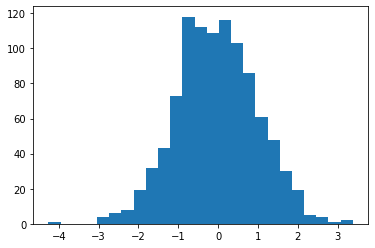

[[5.]
 [6.]
 [6.]
 [4.]
 [5.]
 [4.]
 [4.]
 [5.]
 [8.]
 [5.]]


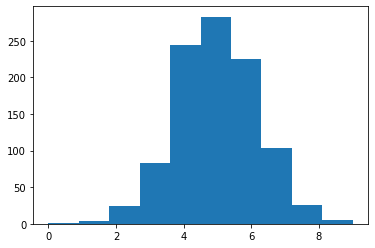

In [3]:
# generate gaussian data sample
data = randn(1000)
# histogram of the raw data
pyplot.hist(data, bins=25)
pyplot.show()
# reshape data to have rows and columns
data = data.reshape((len(data),1))

# discretization transform the raw data
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform') 
data_trans = kbins.fit_transform(data)
# summarize first few rows
print(data_trans[:10, :])

# histogram of the transformed data
pyplot.hist(data_trans, bins=10)
pyplot.show()

In [ ]:
"""
The KBinsDiscretizer is used to map the numerical values to categorical 
values. We configure the transform to create 10 categories (0 to 9), 
to output the result in ordinal format (integers) and to divide the 
range of the input data uniformly. A sample of the transformed
data is printed, clearly showing the integer format of the data as 
expected
"""

### Sonar dataset

In [9]:
dataset = read_csv('../DATASETS/sonar.all-data.csv', header=None)
# summarize the shape of the dataset print(dataset.shape)
# summarize each variable 
print(dataset.describe())


               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118387    0.1

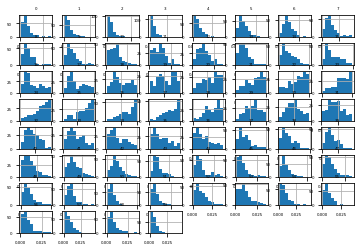

In [10]:
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

### Model on the RAW data

In [ ]:
"""
Next, let’s fit and evaluate a machine learning model on the raw dataset.
We will use a k-nearest neighbor algorithm with default hyperparameters 
and evaluate it using repeated stratified k-fold cross-validation. The 
complete example is listed below.
"""

In [19]:
# load dataset
dataset = read_csv('../DATASETS/sonar.all-data.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


In [ ]:
"""
In this case we can see that the model achieved a mean classification 
accuracy of about 79.7 percent, showing that it has skill (better than 
53.4 percent) and is in the ball-park of good performance (88 percent).
"""

### Uniform Discretization Transform

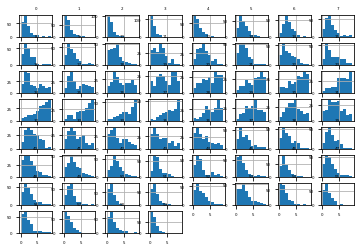

In [23]:
# load dataset
dataset = read_csv('../DATASETS/sonar.all-data.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a uniform discretization transform of the dataset
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform') 
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

In [ ]:
"""
We can see that the shape of the histograms generally matches the shape 
of the raw dataset, although in this case, each variable has a fixed 
number of 10 values or ordinal groups.
"""

### Model on the  transform dataset

In [ ]:
"""
Let’s evaluate the same KNN model as the previous section, but in this 
case on a uniform discretization transform of the dataset.
"""

In [26]:
# load dataset
dataset = read_csv('../DATASETS/sonar.all-data.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.827 (0.082)


In [ ]:
"""
Running the example, we can see that the uniform discretization transform
results in a lift in performance from 79.7 percent accuracy without the 
transform to about 82.7 percent with the transform.
"""

### k-Means Discretization Transform

In [ ]:
"""
A k-means discretization transform will attempt to fit k clusters for 
each input variable and then assign each observation to a cluster. 
Unless the empirical distribution of the variable is complex, the number
of clusters is likely to be small, such as 3-to-5.
"""

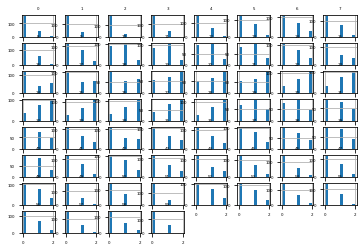

In [27]:
# load dataset
dataset = read_csv('../DATASETS/sonar.all-data.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a k-means discretization transform of the dataset
trans = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans') 
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

In [ ]:
"""
Running the example transforms the dataset and plots histograms of each 
input variable. We can see that the observations for each input variable 
are organized into one of three groups, some of which appear to be quite 
even in terms of observations, and others much less so.
"""

### evaluate the same KNN model as the previous section, but in this case on a k-means discretization transform of the dataset

In [28]:
# load dataset
dataset = read_csv('../DATASETS/sonar.all-data.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.814 (0.088)


In [ ]:
"""
Running the example, we can see that the k-means discretization 
transform results in a lift in performance from 79.7 percent accuracy 
without the transform to about 81.4 percent with the transform, although 
slightly less than the uniform distribution in the previous section.
"""

### Quantile Discretization Transform

In [ ]:
"""
A quantile discretization transform will attempt to split the observations
for each input variable into k groups, where the number of observations as
signed to each group is approximately equal. Unless there are a large number
of observations or a complex empirical distribution, the number of bins m
ust be kept small, such as 5-10.
"""

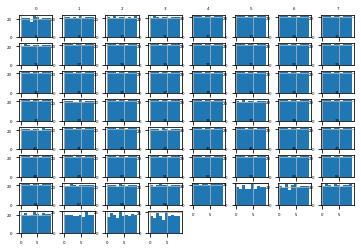

In [29]:
# load dataset
dataset = read_csv('../DATASETS/sonar.all-data.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a quantile discretization transform of the dataset
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile') 
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

In [ ]:
"""
Running the example transforms the dataset and plots histograms of each 
input variable. We can see that the histograms all show a uniform probability
distribution for each input variable, where each of the 10 groups has the
same number of observations.
"""

### Evaluate the model on the quantile Discretization Transform

In [30]:
# load dataset
dataset = read_csv('../DATASETS/sonar.all-data.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) # report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.840 (0.072)


In [ ]:
"""
Running the example, we can see that the uniform transform results in a 
lift in performance from 79.7 percent accuracy without the transform to 
about 84.0 percent with the transform, better than the uniform and 
k-means methods of the previous sections.
"""

### Hyperparameter tuning

In [ ]:
"""
We chose the number of bins as an arbitrary number; in this case, 10. 
This hyperparameter can be tuned to explore the effect of the resolution
of the transform on the resulting skill of the model. The example below
performs this experiment and plots the mean accuracy for different n 
bins values from two to 10.
"""

In [32]:
# get the dataset
def get_dataset():
    # load dataset
    dataset = read_csv('../DATASETS/sonar.all-data.csv', header=None)
    data = dataset.values
    # separate into input and output columns
    X, y = data[:, :-1], data[:, -1]
    # ensure inputs are floats and output is an integer label X = X.astype('float32')
    y = LabelEncoder().fit_transform(y.astype('str'))
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(2,11):
        # define the pipeline
        trans = KBinsDiscretizer(n_bins=i, encode='ordinal', strategy='quantile') 
        model = KNeighborsClassifier()
        models[str(i)] = Pipeline(steps=[('t', trans), ('m', model)])
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
    return scores


# get the dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))


>2 0.806 (0.080)
>3 0.867 (0.070)
>4 0.835 (0.083)
>5 0.838 (0.070)
>6 0.836 (0.071)
>7 0.854 (0.071)
>8 0.837 (0.077)
>9 0.841 (0.069)
>10 0.840 (0.072)


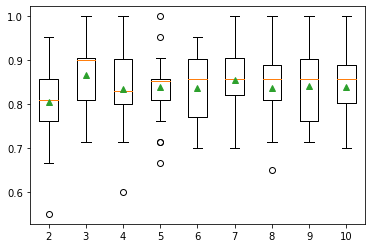

In [33]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
"""
In this case, we can see that surprisingly smaller values resulted in 
better accuracy, with values such as three achieving an accuracy of 
about 86.7 percent.
"""

# References
<hr style="border:2px solid black"> </hr>


- https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/

